Funciones
1. Resta de puntos/vectores
2. Magnitud de un vector
3. Normalización de un vector
4. Suma de vectores
5. Multiplicación por un escalar

In [1]:
#Los puntos serán ingresados como listas
#Se asume que los puntos tienen la misma cantidad de componentes
def restaPuntos(p1,p2):
    resta=list()
    for i in range (0,len(p1)):
        resta.append(p1[i]-p2[i])
    return resta

def sumaPuntos(p1,p2):
    suma=list()
    for i in range (0,len(p1)):
        suma.append(p1[i]+p2[i])
    return suma

In [2]:
import math
from math import sqrt
#Magnitud de un vector, es decir, su magnitud.
def magnitudVector(punto):
    resultado=0
    sumaAuxiliar=0
    for i in range(0,len(punto)):
        sumaAuxiliar+=abs(punto[i])**2
    resultado=sqrt(sumaAuxiliar)
    return resultado

In [3]:
def vectorNormalizado(punto):
    resultado=list()
    magnitudPunto=magnitudVector(punto)
    for i in range(0,len(punto)):
        resultado.append(punto[i]/magnitudPunto)
    return resultado

In [4]:
def multiplicacion(escalar,punto):
    multiplicacion=list()
    for i in range(0,len(punto)):
        multiplicacion.append(punto[i]*escalar)
    return multiplicacion

Cálculo de un punto

In [5]:
#Punto de inicio: q0
#Punto de destino: qdest
#Centroide del obstáculo: qobst

def puntosRobot(q0,qdest,qobst,e1,d0,n,delt0):
    #Los puntos son listas
    #Resultados intermedios:
        #Fuerza de atracción: Fatr
        #Gradiente de repulsión: Drep
        #Fuerza total: F
        #Fuerza normalizada: f
        #nuevo punto: q
    Fatr=multiplicacion(e1,restaPuntos(q0,qdest))
    resta=restaPuntos(q0,qobst)

    #escAux=-n*((1/vectorNormalizado(restaPuntos(q0,qobst)))-(1/d0))*(1/((magnitudVector(q0,qobst))**2))
    escAux = -n * ((1 / magnitudVector(restaPuntos(q0, qobst))) - (1 / d0)) * (1 / (magnitudVector(restaPuntos(q0, qobst)) ** 2))
    Drep=multiplicacion(escAux,vectorNormalizado(restaPuntos(q0,qobst)))
    F=sumaPuntos(Fatr,Drep)
    f=vectorNormalizado(F)
    q=restaPuntos(q0,multiplicacion(delt0,f))

    for i in range(0,len(q)):
        q[i]=round(q[i],4)
    return q

In [6]:
puntosRobot([1,1],[5,4],[2,2],1,5,2,1)

#El único punto que cambia, es el de q0.
#Estos puntos se van a ir guardando en la siguiente lista:
ListaPuntos=[
    [1,1]
]

ListaPuntos.append([1,2])
print(ListaPuntos)

[[1, 1], [1, 2]]


In [7]:
from tabulate import tabulate
#VARIABLES:
qobst=[2,2]
qdest=[5,4]

d0=5
e1=1
n=2
delt0=1
d1=10

ListaPuntos=[[1,1]]

for i in range(0,10):
    q0=ListaPuntos[i]
    ListaPuntos.append(puntosRobot(q0,qdest,qobst,e1,d0,n,delt0))

encabezado=["X","Y"]
tabla=tabulate(ListaPuntos,headers=encabezado,tablefmt="fancy_grid")
print(tabla)

╒════════╤════════╕
│      X │      Y │
╞════════╪════════╡
│ 1      │ 1      │
├────────┼────────┤
│ 1.8095 │ 1.5872 │
├────────┼────────┤
│ 1.5009 │ 0.636  │
├────────┼────────┤
│ 2.2527 │ 1.2953 │
├────────┼────────┤
│ 3.2182 │ 1.0348 │
├────────┼────────┤
│ 3.8213 │ 1.8325 │
├────────┼────────┤
│ 4.3632 │ 2.673  │
├────────┼────────┤
│ 4.8261 │ 3.5594 │
├────────┼────────┤
│ 5.2186 │ 4.4792 │
├────────┼────────┤
│ 4.8081 │ 3.5673 │
├────────┼────────┤
│ 5.2374 │ 4.4705 │
╘════════╧════════╛


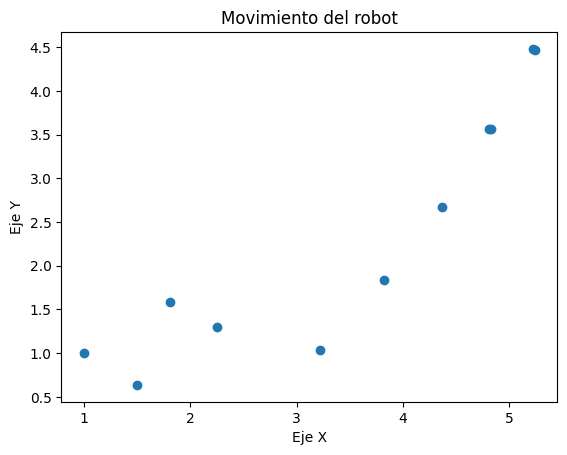

In [8]:
import matplotlib.pyplot as plt
x, y = zip(*ListaPuntos)

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Agregar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Movimiento del robot')

# Mostrar el gráfico
plt.show()